<a href="https://colab.research.google.com/github/Prabhakar002/Image-Processing/blob/master/Improving_quality_by_Pillow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Improving the Quality of Image espacially when the port of the image is croped from a small image or is blurred. This method applied only to balack and white images or numbers.

Increasing the quality of blurred numbers or extract text information by using [Pillow](https://) Library.

# Importing package and image

In [0]:
from PIL import Image

black = (0,0,0)
white = (255,255,255)
threshold = (160,160,160)

# Open input image in grayscale mode and get its pixels.
img = Image.open("Number.jpg").convert("LA")
pixels = img.getdata()

newPixels = []

# Compare each pixel 
for pixel in pixels:
    if pixel < threshold:
        newPixels.append(black)
    else:
        newPixels.append(white)

# Create and save new image.
newImg = Image.new("RGB",img.size)
newImg.putdata(newPixels)
newImg.save("newImage.jpg")

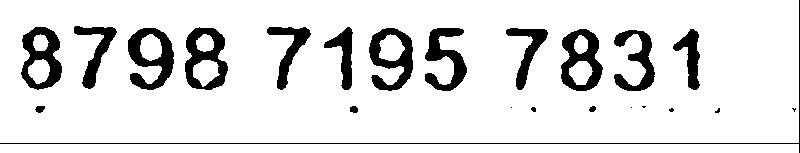

In [17]:
from IPython.display import Image
Image('newImage.jpg')

## And then remove the dots in the image by morphological opening operation. However, this will only work for spots smaller than the linethickness of the numbers in your image. Another option is to remove 'islands' of less than N pixels using the openCV connected components module.

In [0]:
# External libraries used for
# Image IO
from PIL import Image

# Morphological filtering
from skimage.morphology import opening
from skimage.morphology import disk

# Data handling
import numpy as np

# Connected component filtering
import cv2

black = 0
white = 255
threshold = 160

# Open input image in grayscale mode and get its pixels.
img = Image.open("newImage.jpg").convert("LA")
pixels = np.array(img)[:,:,0]

# Remove pixels above threshold
pixels[pixels > threshold] = white
pixels[pixels < threshold] = black


# Morphological opening
blobSize = 1 # Select the maximum radius of the blobs you would like to remove
structureElement = disk(blobSize)  # you can define different shapes, here we take a disk shape
# We need to invert the image such that black is background and white foreground to perform the opening
pixels = np.invert(opening(np.invert(pixels), structureElement))


# Create and save new image.
newImg = Image.fromarray(pixels).convert('RGB')
newImg.save("newImage1.PNG")

# Find the connected components (black objects in your image)
# Because the function searches for white connected components on a black background, we need to invert the image
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(np.invert(pixels), connectivity=8)

# For every connected component in your image, you can obtain the number of pixels from the stats variable in the last
# column. We remove the first entry from sizes, because this is the entry of the background connected component
sizes = stats[1:,-1]
nb_components -= 1

# Define the minimum size (number of pixels) a component should consist of
minimum_size = 100

# Create a new image
newPixels = np.ones(pixels.shape)*255

# Iterate over all components in the image, only keep the components larger than minimum size
for i in range(1, nb_components):
    if sizes[i] > minimum_size:
        newPixels[output == i+1] = 0
        
        
# Create and save new image.
newImg = Image.fromarray(newPixels).convert('RGB')
newImg.save("newImage2.PNG")

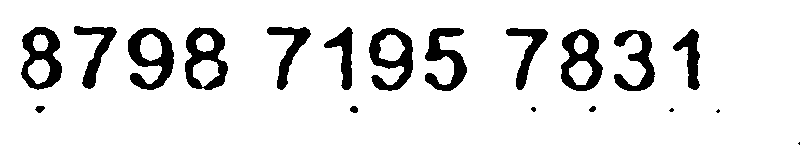

In [21]:
from IPython.display import Image
Image('newImage1.PNG')

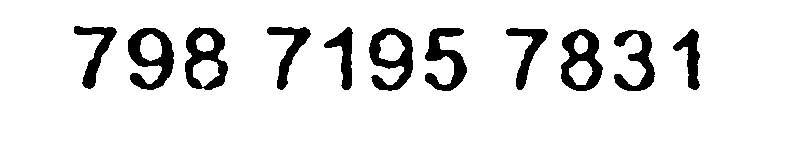

In [22]:
from IPython.display import Image
Image('newImage2.PNG')